# 算法原理

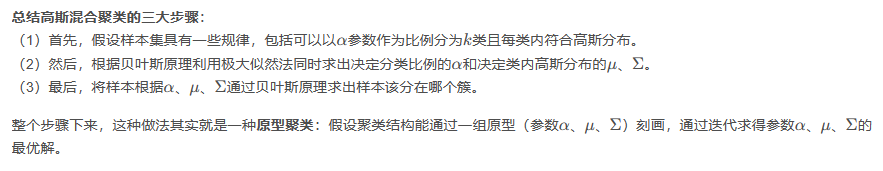

# 数据准备

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # k均值
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
#读取数据
data = pd.read_csv("../data/blobs.csv")
print(data.head())

           a         b  label
0  -0.794152  2.104951      0
1  -9.151552 -4.812864      1
2 -11.441826 -4.457814      1
3  -9.767618 -3.191337      1
4  -4.536556 -8.401863      2


In [3]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

## 肘部法获取最佳聚类数

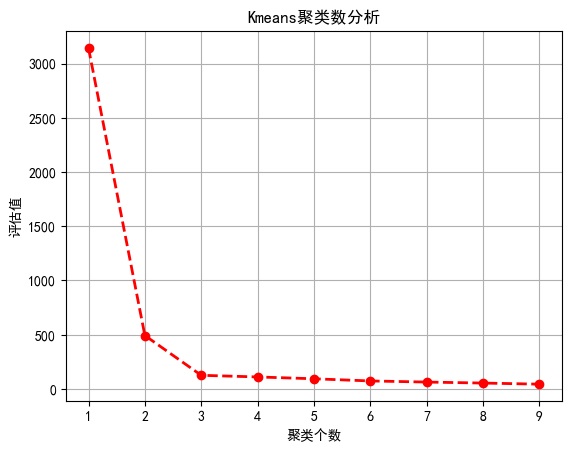

In [4]:
#使用SSE进行模型评估,
sse=[]
for i in range(1,10):
    cluster=KMeans(n_clusters=i,random_state=0, n_init= 'auto').fit(x_train)
    inertia=cluster.inertia_
    sse.append(inertia)
plt.plot(range(1,10),sse,color='red',linewidth=2.0,linestyle='--',marker='o',label='sse')
plt.grid(True)
plt.title("Kmeans聚类数分析")
plt.xlabel("聚类个数")
plt.ylabel("评估值")
plt.savefig("../images/Kmeans聚类数分析.png", dpi=600)
plt.show()

由上图可知，k=3为最佳。

# 模型训练

In [46]:
# 聚类模型
k = 3
model = GaussianMixture(n_components=k)
model.fit(x_train)

GaussianMixture(n_components=3)

Text(0, 0.5, 'Feature 1')

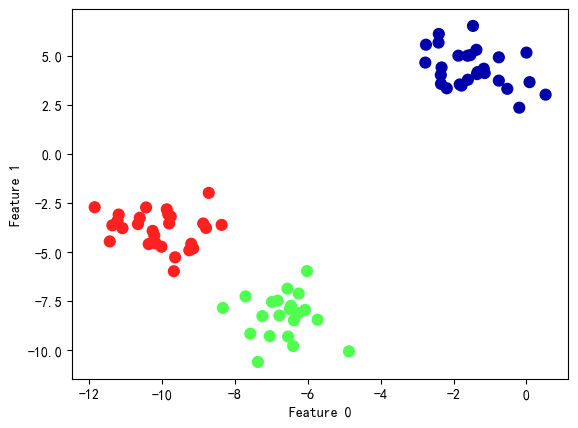

In [47]:
# 绘制聚类结果图
clusters = model.predict(x_train)
plt.scatter(x_train.values[:,0], x_train.values[:,1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 模型保存

In [48]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/gmm.pkl')

# 加载模型
model = joblib.load('../test/best_models/gmm.pkl')

In [49]:
# 法二
import pickle

with open('../test/best_models/gmm.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/gmm.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [50]:
prediction = model.predict(x_test)

In [51]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

